# High res. CMIP6

Analysis of higher res. CMIP6 models (100km)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import dask.distributed as dsk
import glob
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr 

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/'

clnt = dsk.Client()
clnt

<Client: 'tcp://127.0.0.1:44137' processes=4 threads=16, memory=250.00 GiB>

In [103]:
# Font size
plt.rcParams['font.size'] = 16
# Axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# Saving parameters
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

def change_lon_space(ds, grid):
    if grid == 'u':
        ds = ds.rename(({'xu_ocean':'lon', 'yu_ocean':'lat'}))
        ds['_lon_adj'] = xr.where(ds['lon'] < 0, ds['lon'] + 360, ds['lon'])
        ds = ds.swap_dims({'lon': '_lon_adj'})
        ds = ds.sel(**{'_lon_adj': sorted(ds._lon_adj)}).drop('lon')
        ds = ds.rename({'_lon_adj': 'lon'})
    elif grid == 't':
        ds = ds.rename(({'xt_ocean':'lon', 'yt_ocean':'lat'}))
        ds['_lon_adj'] = xr.where(ds['lon'] < 0, ds['lon'] + 360, ds['lon'])
        ds = ds.swap_dims({'lon': '_lon_adj'})
        ds = ds.sel(**{'_lon_adj': sorted(ds._lon_adj)}).drop('lon')
        ds = ds.rename({'_lon_adj': 'lon'})
    return ds

def circumpolar_map():
    
    fig = plt.figure(figsize = (15, 15))
    gr = gs.GridSpec(8, 2, figure = fig, height_ratios = [1, 1, 1, 1, 1, 1, 1, .1])
    axs = [fig.add_subplot(gr[0,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[0,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[1,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[1,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[2,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[2,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[3,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[3,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[4,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[4,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[5,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[5,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[6,0], projection = ccrs.Mercator(central_longitude = 180)), fig.add_subplot(gr[6,1], projection = ccrs.Mercator(central_longitude = 180)),
           fig.add_subplot(gr[7,:])]#, fig.add_subplot(gr[7,1])]
    
    for ax in axs[:-1]:
        ax.set_extent([0, 2600, -80, -50], crs = ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                        edgecolor = 'darkgrey', facecolor = 'darkgrey'))
        ax.set_xticks(np.arange(0, 400, 50), crs = ccrs.PlateCarree())
        ax.set_yticks([-75, -70, -65, -60, -55], crs = ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label = False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
    
    return fig, axs

def extract_so(ds):
    ds_so = ds.sel(lat = slice(None, -50))
    return ds_so

def amundsen_map():
    
    fig = plt.figure(figsize = (20, 15))
    gr = gs.GridSpec(8, 4, figure = fig, height_ratios = [1, 1, 1, .2, .2, .2, .2, .2])
    axs = [fig.add_subplot(gr[0,0], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[0,1], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[0,2], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[0,3], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[1,0], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[1,1], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[1,2], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[1,3], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[2,0], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[2,1], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[2,2], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[2,3], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[3:,0], projection = ccrs.Mercator(central_longitude = 260)), fig.add_subplot(gr[3:,1], projection = ccrs.Mercator(central_longitude = 260)),
           fig.add_subplot(gr[4,2:]), fig.add_subplot(gr[6,2:])]
    
    for ax in axs[:-2]:
        ax.set_extent([220, 300, -77, -60], crs = ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                        linewidth = 2, edgecolor = 'darkgrey', facecolor = 'darkgrey'), zorder = 2)
        ax.set_xticks(np.arange(220, 320, 20), crs = ccrs.PlateCarree())
        ax.set_yticks([-75, -70, -65, -60], crs = ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label = False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
    
    return fig, axs

def prydz_map():
    
    fig = plt.figure(figsize = (15, 10))
    gr = gs.GridSpec(8, 4, figure = fig, height_ratios = [1, 1, 1, .2, .2, .2, .2, .2])
    axs = [fig.add_subplot(gr[0,0], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[0,1], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[0,2], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[0,3], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[1,0], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[1,1], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[1,2], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[1,3], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[2,0], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[2,1], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[2,2], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[2,3], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[3:,0], projection = ccrs.Mercator(central_longitude = 55)), fig.add_subplot(gr[3:,1], projection = ccrs.Mercator(central_longitude = 55)),
           fig.add_subplot(gr[4,2:]), fig.add_subplot(gr[6,2:])]
    
    for ax in axs[:-2]:
        ax.set_extent([30, 80, -72, -60], crs = ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                        linewidth = 2, edgecolor = 'darkgrey', facecolor = 'darkgrey'), zorder = 2)
        ax.set_xticks(np.arange(30, 90, 20), crs = ccrs.PlateCarree())
        ax.set_yticks([-72, -70, -65, -60], crs = ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label = False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

    return fig, axs

def adelie_map():
    
    fig = plt.figure(figsize = (15, 8))
    gr = gs.GridSpec(8, 4, figure = fig, height_ratios = [1, 1, 1, .2, .2, .2, .2, .2])
    axs = [fig.add_subplot(gr[0,0], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[0,1], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[0,2], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[0,3], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[1,0], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[1,1], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[1,2], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[1,3], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[2,0], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[2,1], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[2,2], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[2,3], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[3:,0], projection = ccrs.Mercator(central_longitude = 120)), fig.add_subplot(gr[3:,1], projection = ccrs.Mercator(central_longitude = 120)),
           fig.add_subplot(gr[4,2:]), fig.add_subplot(gr[6,2:])]
    
    for ax in axs[:-2]:
        ax.set_extent([90, 150, -70, -60], crs = ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                        linewidth = 2, edgecolor = 'darkgrey', facecolor = 'darkgrey'), zorder = 2)
        ax.set_xticks(np.arange(90, 170, 20), crs = ccrs.PlateCarree())
        ax.set_yticks([-70, -70, -65, -60], crs = ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(zero_direction_label = False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

    return fig, axs

In [3]:
hu = xr.open_dataset('~/g_e14/misc/hu-01deg.nc')['hu']
hu = extract_so(change_lon_space(hu, 'u'))

In [4]:
high_res = ['INM-CM4-8', 'INM-CM5-0', 'FGOALS-f3-L', 'GFDL-ESM4', 'EC-Earth3-CC', 'EC-Earth3-Veg', 'EC-Earth3', 'AWI-CM-1-1-MR',
            'MPI-ESM1-2-HR', 'EC-Earth3-AerChem', 'BCC-CSM2-MR', 'GFDL-CM4', 'MRI-ESM2-0']

In [5]:
# JRA55do-v14
uas_jra = xr.open_dataset('/scratch/e14/jn8053/jra55/uas-v14-monthly-1958_2019.nc').sel(lat = slice(None, -50)).sel(time = slice('1958-01-01', '2015-01-01'))
vas_jra = xr.open_dataset('/scratch/e14/jn8053/jra55/vas-v14-monthly-1958_2019.nc').sel(lat = slice(None, -50)).sel(time = slice('1958-01-01', '2015-01-01'))

# Mean fields - JRA55

In [6]:
# CMIP6 individual models interpolated to jra55 grid
uas_cmip = {}
vas_cmip = {}
for model_name in high_res:
    uas_cmip[model_name] = xr.open_dataset('/scratch/e14/jn8053/cmip6/historical/uas-regrid/uas_historical_'+model_name+'.nc')
    uas_cmip[model_name] = extract_so(uas_cmip[model_name])
    vas_cmip[model_name] = xr.open_dataset('/scratch/e14/jn8053/cmip6/historical/vas-regrid/vas_historical_'+model_name+'.nc')
    vas_cmip[model_name] = extract_so(vas_cmip[model_name])
model_names = list(uas_cmip.keys())

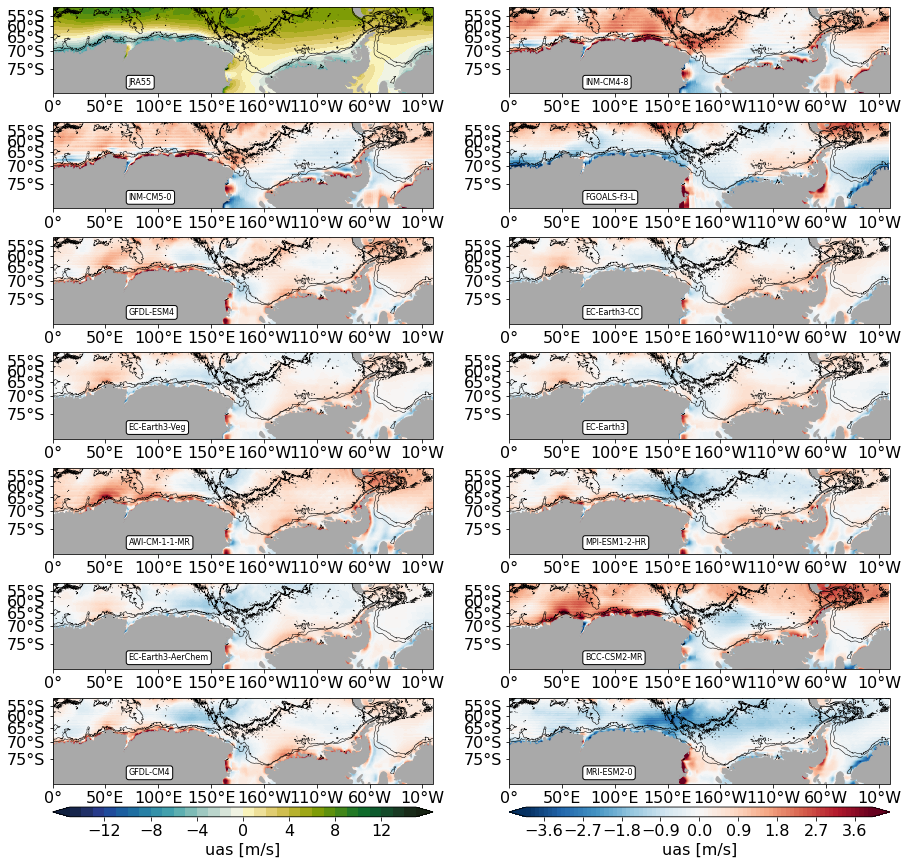

In [33]:
fig, axs = circumpolar_map()
cf = axs[0].contourf(uas_jra['lon'], uas_jra['lat'], uas_jra['uas'].mean('time'),
                     levels = np.arange(-15, 16, 1), cmap = cmocean.cm.delta, extend = 'both', transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = .5, transform = ccrs.PlateCarree())
fig.colorbar(cf, cax = axs[-2], orientation = 'horizontal', shrink = .5).set_label('uas [m/s]')
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
n = 1
for name in model_names:
    cf = axs[n].contourf(uas_cmip[name]['lon'], uas_cmip[name]['lat'], uas_cmip[name]['uas'].mean('time') - uas_jra['uas'].mean('time'),
                         levels = np.arange(-4, 4.1, .1), cmap = 'RdBu_r', extend = 'both', transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = .5, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-1], orientation = 'horizontal', shrink = .5).set_label('uas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/uas_mean_cmip6highres-jra55.png', facecolor = 'white', bbox_inches = 'tight')

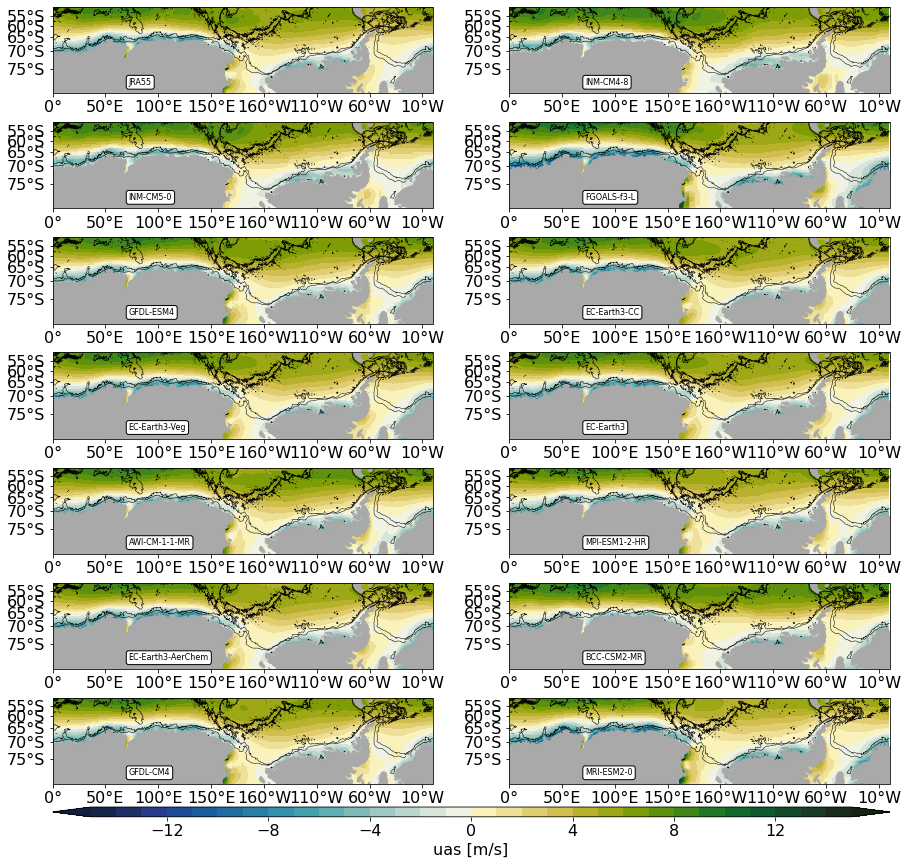

In [104]:
fig, axs = circumpolar_map()
cf = axs[0].contourf(uas_jra['lon'], uas_jra['lat'], uas_jra['uas'].mean('time'),
                     levels = np.arange(-15, 16, 1), cmap = cmocean.cm.delta, extend = 'both', transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = .5, transform = ccrs.PlateCarree())
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
n = 1
for name in model_names:
    cf = axs[n].contourf(uas_cmip[name]['lon'], uas_cmip[name]['lat'], uas_cmip[name]['uas'].mean('time'),
                         levels = np.arange(-15, 16, 1), cmap = cmocean.cm.delta, extend = 'both', transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = .5, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-1], orientation = 'horizontal', shrink = .5).set_label('uas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/uas_mean_cmip6highres-jra55-abs.png', facecolor = 'white', bbox_inches = 'tight')

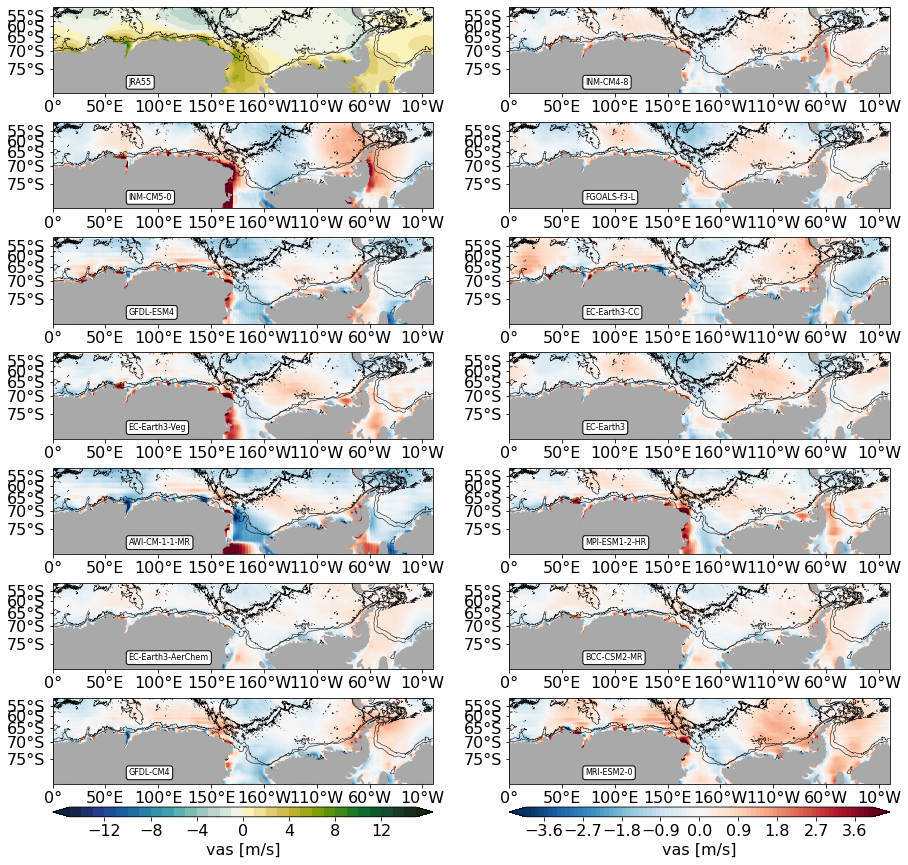

In [34]:
fig, axs = circumpolar_map()
cf = axs[0].contourf(vas_jra['lon'], vas_jra['lat'], vas_jra['vas'].mean('time'),
                     levels = np.arange(-15, 16, 1), cmap = cmocean.cm.delta, extend = 'both', transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = .5, transform = ccrs.PlateCarree())
fig.colorbar(cf, cax = axs[-2], orientation = 'horizontal', shrink = .5).set_label('vas [m/s]')
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
n = 1
for name in model_names:
    cf = axs[n].contourf(vas_cmip[name]['lon'], vas_cmip[name]['lat'], vas_cmip[name]['vas'].mean('time') - vas_jra['vas'].mean('time'),
                         levels = np.arange(-4, 4.1, .1), cmap = 'RdBu_r', extend = 'both', transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = .5, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-2:], orientation = 'horizontal', shrink = .5).set_label('vas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/vas_mean_cmip6highres-jra55.png', facecolor = 'white', bbox_inches = 'tight')

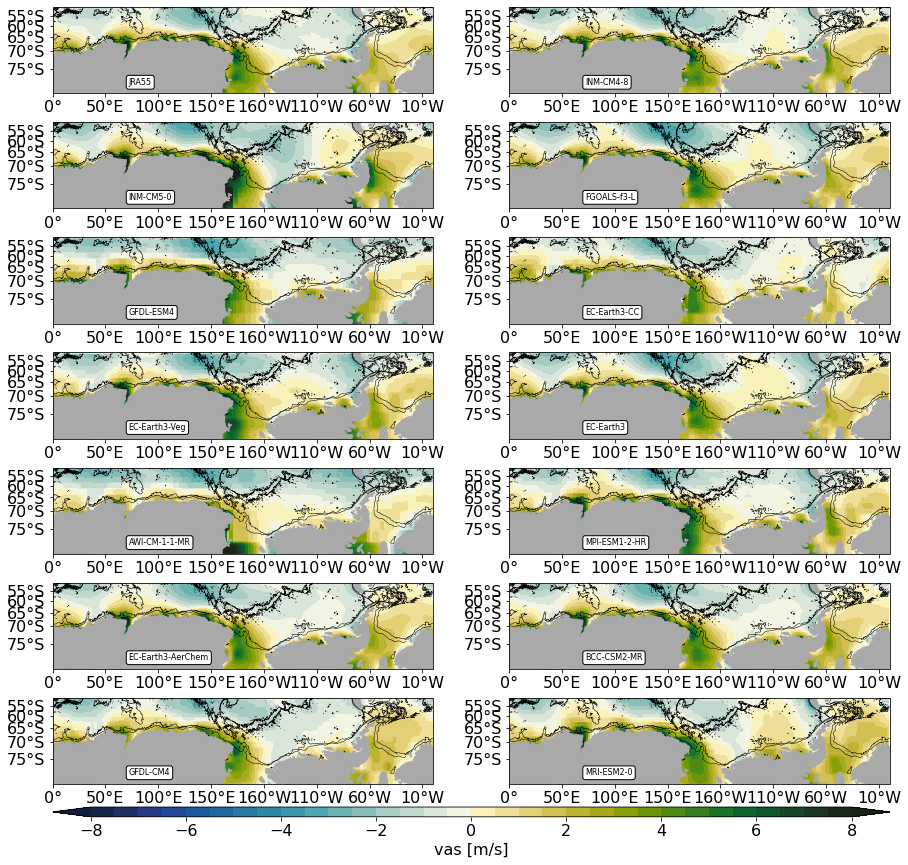

In [107]:
fig, axs = circumpolar_map()
cf = axs[0].contourf(vas_jra['lon'], vas_jra['lat'], vas_jra['vas'].mean('time'),
                     levels = np.arange(-8, 8.5, .5), cmap = cmocean.cm.delta, extend = 'both', transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = .5, transform = ccrs.PlateCarree())
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
n = 1
for name in model_names:
    cf = axs[n].contourf(vas_cmip[name]['lon'], vas_cmip[name]['lat'], vas_cmip[name]['vas'].mean('time'),
                         levels = np.arange(-8, 8.5, .5), cmap = cmocean.cm.delta, extend = 'both', transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = .5, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-1], orientation = 'horizontal', shrink = .5).set_label('vas [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/vas_mean_cmip6highres-jra55-abs.png', facecolor = 'white', bbox_inches = 'tight')

# Regional mean map - Amundsen

In [11]:
WS = {}
for name in model_names:
    WS[name] = np.sqrt(uas_cmip[name]['uas'].mean('time')**2 + vas_cmip[name]['vas'].mean('time')**2)
WS_jra = np.sqrt(uas_jra['uas'].mean('time')**2 + vas_jra['vas'].mean('time')**2)

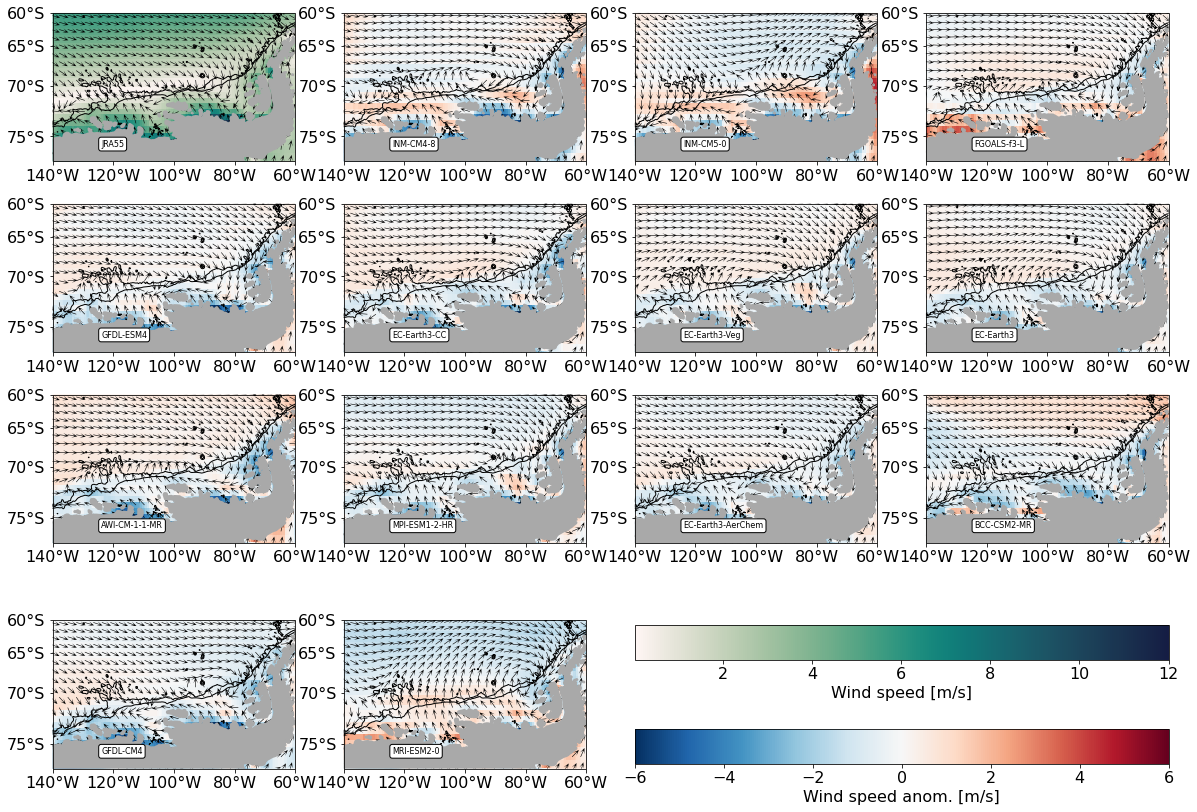

In [30]:
fig, axs = amundsen_map()
cf = axs[0].pcolormesh(uas_jra['lon'], uas_jra['lat'], WS_jra, 
                       cmap = cmocean.cm.tempo, vmax = 12, transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = 1, transform = ccrs.PlateCarree())
axs[0].quiver(uas_jra['lon'][::5], uas_jra['lat'][::2], 
              uas_jra['uas'].mean('time').values[::2, ::5]/WS_jra.values[::2, ::5], 
              vas_jra['vas'].mean('time').values[::2, ::5]/WS_jra.values[::2, ::5], 
              scale = 25, headwidth = 8, headlength = 10, transform = ccrs.PlateCarree())
fig.colorbar(cf, cax = axs[-2], orientation = 'horizontal', shrink = .5).set_label('Wind speed [m/s]')
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

n = 1
for name in model_names:
    cf = axs[n].pcolormesh(WS[name]['lon'], WS[name]['lat'], WS[name] - WS_jra, 
                           cmap = 'RdBu_r', vmin = -6, vmax = 6, transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = 1, transform = ccrs.PlateCarree())
    axs[n].quiver(uas_cmip[name]['lon'][::5], uas_cmip[name]['lat'][::2], 
                  uas_cmip[name]['uas'].mean('time').values[::2, ::5]/WS[name].values[::2, ::5], 
                  vas_cmip[name]['vas'].mean('time').values[::2, ::5]/WS[name].values[::2, ::5], 
                  scale = 25, headwidth = 8, headlength = 10, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-1], orientation = 'horizontal', shrink = .5).set_label('Wind speed anom. [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/wind-amundsen_cmip6highres-jra55.png', facecolor = 'white', bbox_inches = 'tight')

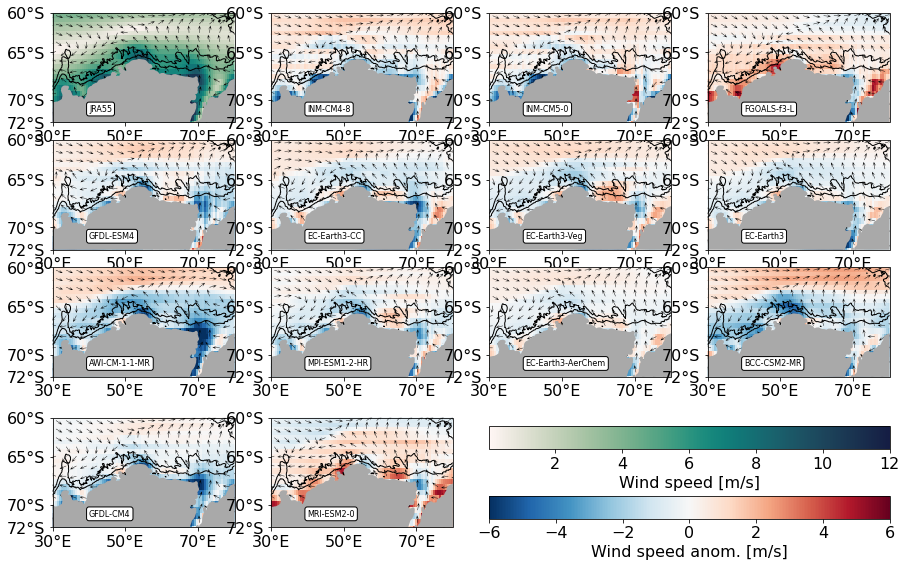

In [79]:
fig, axs = prydz_map()
cf = axs[0].pcolormesh(uas_jra['lon'], uas_jra['lat'], WS_jra, 
                       cmap = cmocean.cm.tempo, vmax = 12, transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = 1, transform = ccrs.PlateCarree())
axs[0].quiver(uas_jra['lon'][::5], uas_jra['lat'][::2], 
              uas_jra['uas'].mean('time').values[::2, ::5]/WS_jra.values[::2, ::5], 
              vas_jra['vas'].mean('time').values[::2, ::5]/WS_jra.values[::2, ::5], 
              scale = 25, headwidth = 8, headlength = 10, transform = ccrs.PlateCarree())
fig.colorbar(cf, cax = axs[-2], orientation = 'horizontal', shrink = .5).set_label('Wind speed [m/s]')
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

n = 1
for name in model_names:
    cf = axs[n].pcolormesh(WS[name]['lon'], WS[name]['lat'], WS[name] - WS_jra, 
                           cmap = 'RdBu_r', vmin = -6, vmax = 6, transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = 1, transform = ccrs.PlateCarree())
    axs[n].quiver(uas_cmip[name]['lon'][::5], uas_cmip[name]['lat'][::2], 
                  uas_cmip[name]['uas'].mean('time').values[::2, ::5]/WS[name].values[::2, ::5], 
                  vas_cmip[name]['vas'].mean('time').values[::2, ::5]/WS[name].values[::2, ::5], 
                  scale = 25, headwidth = 8, headlength = 10, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-1], orientation = 'horizontal', shrink = .5).set_label('Wind speed anom. [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/wind-prydz_cmip6highres-jra55.png', facecolor = 'white', bbox_inches = 'tight')

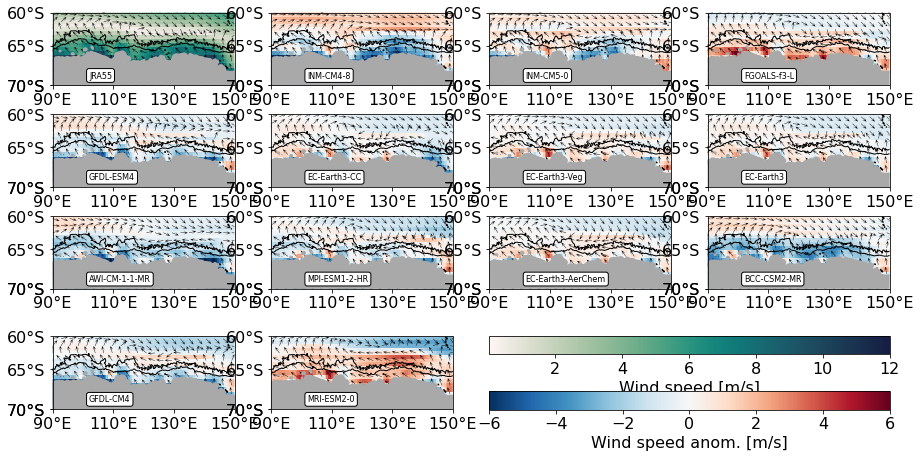

In [94]:
fig, axs = adelie_map()
cf = axs[0].pcolormesh(uas_jra['lon'], uas_jra['lat'], WS_jra, 
                       cmap = cmocean.cm.tempo, vmax = 12, transform = ccrs.PlateCarree())
axs[0].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
               linewidths = 1, transform = ccrs.PlateCarree())
axs[0].quiver(uas_jra['lon'][::5], uas_jra['lat'][::2], 
              uas_jra['uas'].mean('time').values[::2, ::5]/WS_jra.values[::2, ::5], 
              vas_jra['vas'].mean('time').values[::2, ::5]/WS_jra.values[::2, ::5], 
              scale = 25, headwidth = 8, headlength = 10, transform = ccrs.PlateCarree())
fig.colorbar(cf, cax = axs[-2], orientation = 'horizontal', shrink = .5).set_label('Wind speed [m/s]')
axs[0].text(0.2, 0.1, 'JRA55', fontsize = 8, transform = axs[0].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))

n = 1
for name in model_names:
    cf = axs[n].pcolormesh(WS[name]['lon'], WS[name]['lat'], WS[name] - WS_jra, 
                           cmap = 'RdBu_r', vmin = -6, vmax = 6, transform = ccrs.PlateCarree())
    axs[n].contour(hu['lon'], hu['lat'], hu, levels = [1000,3000], colors = 'k',
                   linewidths = 1, transform = ccrs.PlateCarree())
    axs[n].quiver(uas_cmip[name]['lon'][::5], uas_cmip[name]['lat'][::2], 
                  uas_cmip[name]['uas'].mean('time').values[::2, ::5]/WS[name].values[::2, ::5], 
                  vas_cmip[name]['vas'].mean('time').values[::2, ::5]/WS[name].values[::2, ::5], 
                  scale = 25, headwidth = 8, headlength = 10, transform = ccrs.PlateCarree())
    axs[n].text(0.2, 0.1, name, fontsize = 8, transform = axs[n].transAxes, bbox = dict(boxstyle = 'round', facecolor = 'white'))
    n += 1
fig.colorbar(cf, cax = axs[-1], orientation = 'horizontal', shrink = .5).set_label('Wind speed anom. [m/s]')
plt.savefig(figdir+'/easterlies-collaborative/cmip6/mean/wind-adelie_cmip6highres-jra55.png', facecolor = 'white', bbox_inches = 'tight')